In [37]:
import random
import time
import matplotlib.pyplot as plt
from statistics import median

Insertion Sort is a sorting algorithm that builds the final sorted array one item at a time.

Start from the second element of the array and compare it with elements before it. If previous elements are bigger, shift them right and place the current element in its correct position repeat for all elements untill the array is sorted.

Example with $[5,2,4,1]$:

Take 2: $[5|2,4,1] = [2,5|4,1]$


Take 4: $[2,5|4,1] = [2,4,5|1]$


Take 1: $[2,4,5|1] = [1,2,4,5]$

The | divides the sorted part from the unsorted list.

In [2]:
# This function cheacks if the list is sorted.
def checkorder(a):
    for index in range(1, len(a)):
        if a[index] < a[index - 1]:
            return False
    return True

In [3]:
# An example of how the functions work.
n = 10000
b = [random.random() for i  in range(n)]

In [7]:
def insertionsort(a):
    a = a.copy()
    for i in range(1, len(a)):
        num = a[i]
        for j in range(i-1 , -1, -1):
            if (a[j] > num):
                a[j+1] = a[j]
            else:
                a[j+1] = num
                break
            if(j == 0):
                a[j] = num
                break
    return a

In [11]:
%%timeit
insertionsort(b)

1.6 s ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
print(checkorder(insertionsort(b)))

True


I am measuring how long insertion sort takes for different sizes. I take a sorted list and record the time it takes to run insertion sort for a size in nanoseconds and then store the runtimes in a list. 


In [15]:
array_size = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
runtime = []

for i in array_size:
    test_list = list(range(i))
    
    start = time.perf_counter_ns()
    insertionsort(test_list)  
    stop = time.perf_counter_ns()
    
    run_time = (stop - start)
    runtime.append(run_time)
print(runtime)


[607875, 592708, 906958, 2256625, 1557250, 1881708, 1979250, 2082250, 2285708, 2689958]


There is a lot of variation because of the nature of the system.

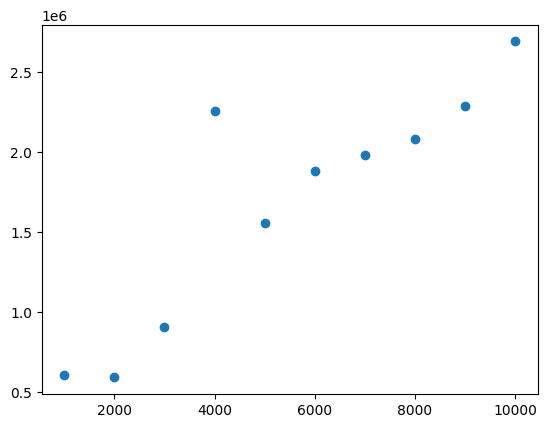

In [16]:
plt.scatter(array_size, runtime)

This is an arrays of 30 numbers. For each number, it runs insertion sort three times and takes the median These median times are stored in a list which can be used to analyze and visualize how insertion sort's running time grows with array size.

I take the median to reduce the variation.

In [39]:
array_size = [1000 * i for i in range(30)]
runtime_median = []
for i in array_size:
    times = []
    for a in range(3): 
        test_list = list(range(i))

        start = time.perf_counter_ns()
        insertionsort(test_list)
        stop = time.perf_counter_ns()
        times.append(stop - start)
    times.sort() 
    median_time = median(times)
    runtime_median.append(median_time)

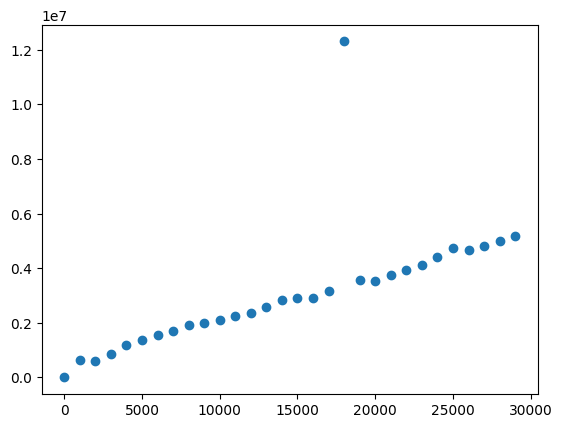

In [41]:
# It grows linearly
plt.scatter(array_size, runtime_median)

Since insertion sort is an $O(n^2)$ algorithm, it will be a quadratic curve - as the array size increases, the runtime increases much faster following a parabola shape.

Previously, I was using a sorted list. This is with random sizes.

In [42]:
# Without a sorted list
array_size = [1000 * i for i in range(30)]
runtime_median_random = []

for i in array_size:
    times = []
    test_list = [random.random() for _ in range(i)]

    for a in range(3): 
        start = time.perf_counter_ns()
        insertionsort(test_list)
        stop = time.perf_counter_ns()
        times.append(stop - start)
        
    times.sort() 
    median_time = median(times)
    print(f'done with array size {i}')
    runtime_median_random.append(median_time)

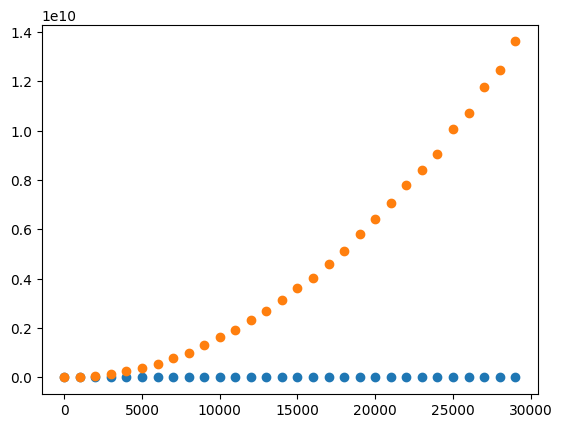

In [43]:
plt.scatter(array_size, runtime_median)
plt.scatter(array_size, runtime_median_random)

This is with a reverse sorted list- worst case scenario

In [44]:
array_size = [1000 * i for i in range(30)]
runtime_median_reverse = []

for i in array_size:
    times = []
    test_list = list(range(i, 0, -1))

    for a in range(3): 
        start = time.perf_counter_ns()
        insertionsort(test_list)
        stop = time.perf_counter_ns()
        times.append(stop - start)
        
    times.sort() 
    median_time = median(times)
    runtime_median_reverse.append(median_time)

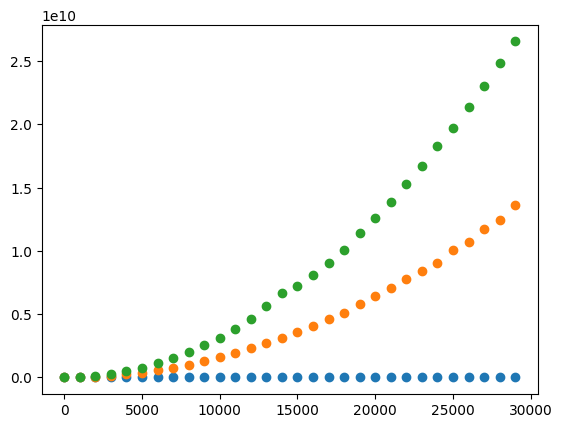

In [45]:
plt.scatter(array_size, runtime_median)
plt.scatter(array_size, runtime_median_random)
plt.scatter(array_size, runtime_median_reverse)

When the input data is sorted we get a linear runtime because no elements move. This takes the least amount of time and is the best case scenario. This is the blue curve in the graph above.

The worst case is the reverse sorted list as every element has to be moved from its position to the beginning of the list. This takes the most amount of time. This is the green curve in the graph above.

The average case is between the quadratic cure and the linear curve, when the list is random. This is the orange curve in the graph above.